[View in Colaboratory](https://colab.research.google.com/github/Sharwon/fastai-intro-kit/blob/master/fastai_lesson1_dogsvscats.ipynb)

In [1]:
ls

sample_data/


**DATA SET**

Downoading the dataset.

In [2]:
!wget http://files.fast.ai/data/dogscats.zip


Redirecting output to ‘wget-log’.


Extrating the downloaded dataset.

In [0]:
!unzip -q dogscats.zip

**GETTING THE NECESSARY LIBRARIES/FRAMEWORKS**

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [7]:
!pip install fastai

    100% |████████████████████████████████| 122kB 7.9MB/s 
    100% |████████████████████████████████| 112kB 29.4MB/s 
    100% |████████████████████████████████| 184kB 27.3MB/s 
    100% |████████████████████████████████| 2.2MB 933kB/s 
    100% |████████████████████████████████| 51kB 23.3MB/s 
    100% |████████████████████████████████| 3.6MB 8.8MB/s 
    100% |████████████████████████████████| 1.5MB 11.3MB/s 
    100% |████████████████████████████████| 92kB 22.8MB/s 
    100% |████████████████████████████████| 11.6MB 848kB/s 
    100% |████████████████████████████████| 112kB 26.9MB/s 
    100% |████████████████████████████████| 901kB 20.2MB/s 
    100% |████████████████████████████████| 71kB 25.7MB/s 
    100% |████████████████████████████████| 4.4MB 7.7MB/s 
    100% |████████████████████████████████| 15.8MB 3.0MB/s 
    100% |████████████████████████████████| 1.5MB 17.4MB/s 
    100% |████████████████████████████████| 81kB 27.7MB/s 
    100% |████████████████████████████████| 71kB

**Downloading the precompiled weights (trained model), and adding it to the root directory.**

In [8]:
cd /usr/local/lib/python3.6/dist-packages/fastai

/usr/local/lib/python3.6/dist-packages/fastai


In [9]:
!wget http://files.fast.ai/models/weights.tgz


Redirecting output to ‘wget-log’.


In [10]:
!tar -xvzf weights.tgz

weights/
weights/wrn_50_2f.pth
weights/resnext_101_32x4d.pth
weights/resnext_101_64x4d.pth
weights/inceptionresnetv2-d579a627.pth
weights/inceptionv4-97ef9c30.pth
weights/resnext_50_32x4d.pth


## Dogs v Cats super-charged!

BACK TO OUR WORKING DIRECTORY AND RUNNING THE CODE.

In [11]:
# google colab home dir
cd /content/

/content


In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [14]:
# google colab image issues
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

    100% |████████████████████████████████| 5.6MB 6.7MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.3MB 844kB/s 


# Data

In [0]:
PATH = "dogscats/"

In [16]:
files = !ls {PATH}valid/cats | head
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

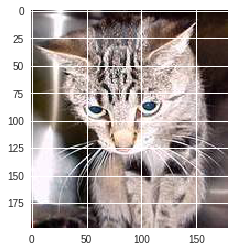

In [17]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [18]:
img.shape

(198, 179, 3)

In [19]:
img[:4,:4]

array([[[ 29,  20,  23],
        [ 31,  22,  25],
        [ 34,  25,  28],
        [ 37,  28,  31]],

       [[ 60,  51,  54],
        [ 58,  49,  52],
        [ 56,  47,  50],
        [ 55,  46,  49]],

       [[ 93,  84,  87],
        [ 89,  80,  83],
        [ 85,  76,  79],
        [ 81,  72,  75]],

       [[104,  95,  98],
        [103,  94,  97],
        [102,  93,  96],
        [102,  93,  96]]], dtype=uint8)

# New Section

In [0]:
sz = 224
arch = resnet34
bs=32

In [21]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 19919535.68it/s]


100%|██████████| 63/63 [00:15<00:00,  4.19it/s]


In [24]:
%%time
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.047739   0.029891   0.9895    

CPU times: user 8.95 s, sys: 5.15 s, total: 14.1 s
Wall time: 11.8 s


[array([0.02989]), 0.9895]

In [25]:
#Choosing hyper-parameter
lrf=learn.lr_find()

 70%|██████▉   | 501/719 [00:08<00:05, 40.80it/s, loss=0.155]


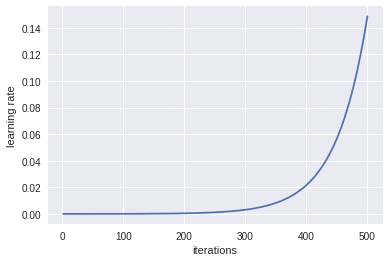

In [26]:
learn.sched.plot_lr() 

In [0]:
# print true cats and dogs. (end)

In [27]:
#labels
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [29]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [30]:
log_preds[:10]

array([[ -0.     , -13.36144],
       [ -0.00003, -10.40462],
       [ -0.00035,  -7.96449],
       [ -0.00041,  -7.79002],
       [ -0.00003, -10.37312],
       [ -0.00003, -10.39171],
       [ -0.00003, -10.40252],
       [ -0.00023,  -8.36387],
       [ -1.54498,  -0.23993],
       [ -0.00027,  -8.23502]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1) # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1]) # probability of a dog

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


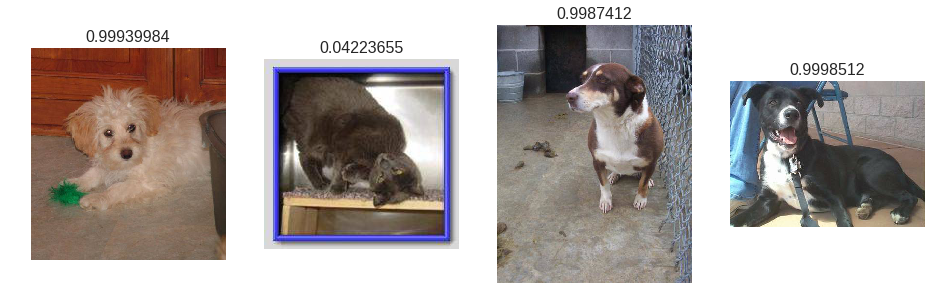

In [37]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


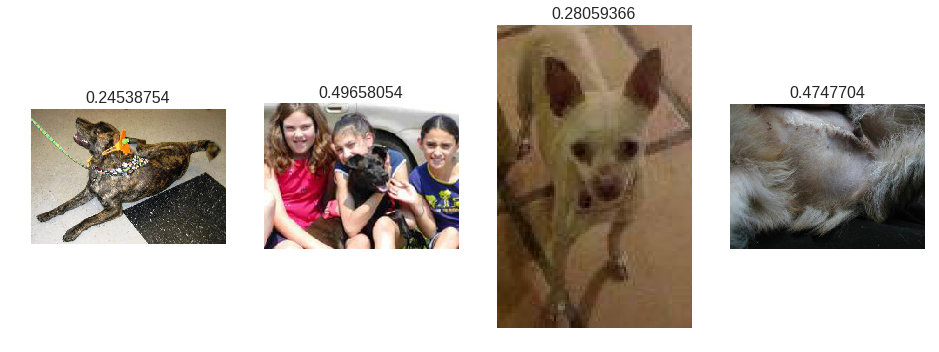

In [38]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


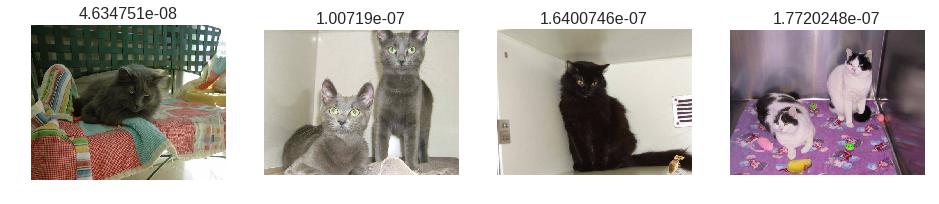

In [40]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


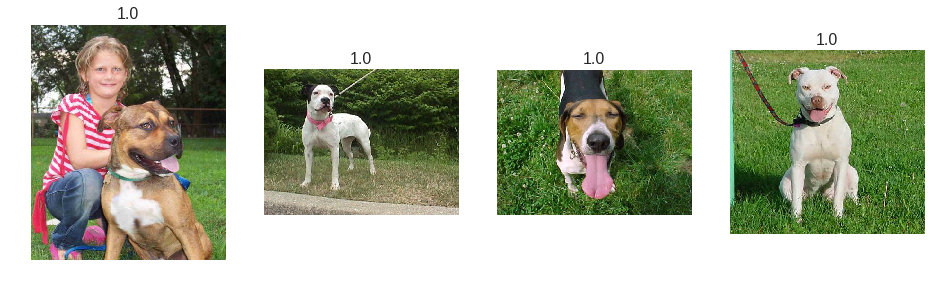

In [41]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


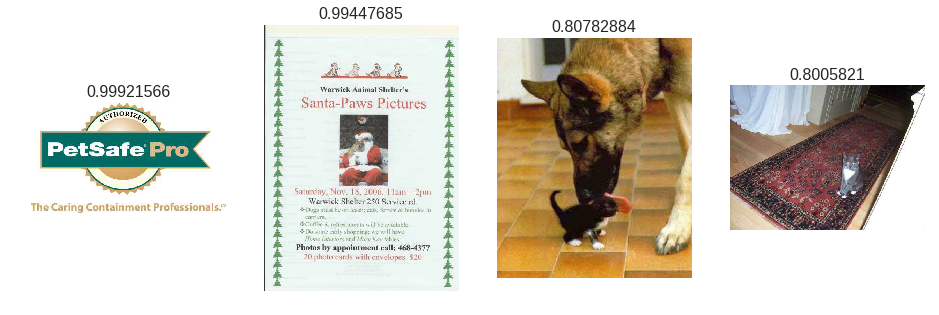

In [42]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


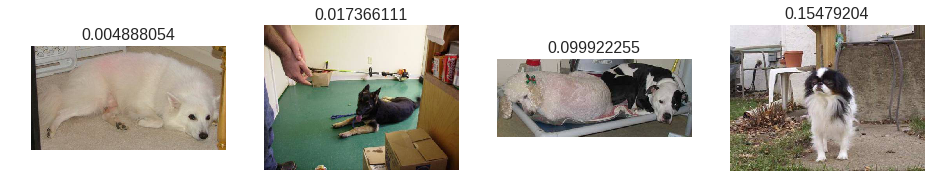

In [43]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

# Improve model

In [0]:
tfms = tfms_from_model(resnet34, 
                       sz, 
                       aug_tfms=transforms_side_on, 
                       max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

In [0]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(lr-find, 1)

In [0]:
learn.precompute=False
learn.fit(1e-2, 2, cycle_len=1)

A Jupyter Widget

[ 0.       0.03622  0.01899  0.99504]                         
[ 1.       0.02817  0.01762  0.99454]                         



In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
# 3 is the number of cycles
# 3 cycles of 2 epochs
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.03577  0.01557  0.99504]                         
[ 1.       0.03684  0.01287  0.99554]                         
[ 2.       0.02823  0.01572  0.99653]                         



In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all_unfreeze')

In [0]:
learn.load('224_all_unfreeze')

In [0]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.99750000000000005

## Analyzing results

In [0]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[996   4]
 [  1 999]]


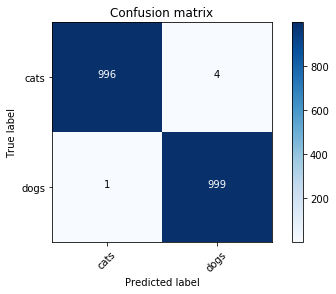

In [0]:
plot_confusion_matrix(cm, data.classes)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most incorrect cats


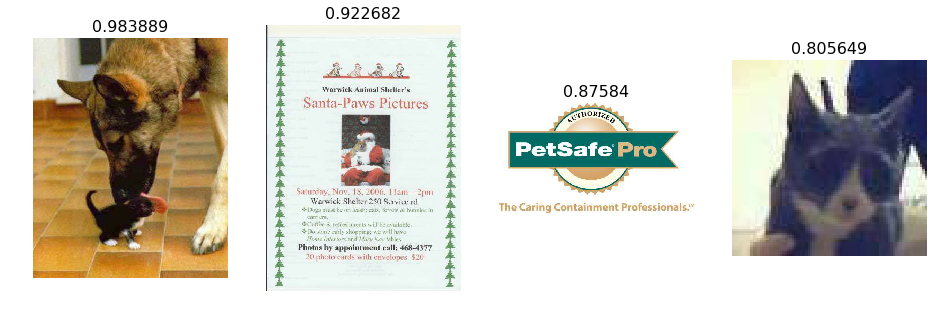

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


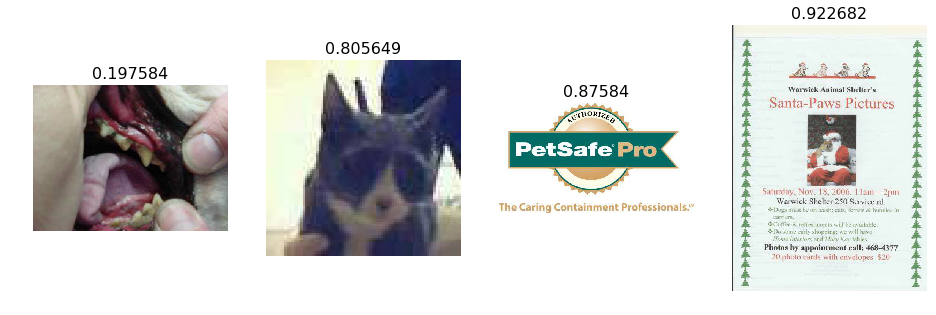

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")